# N dimensional Plane

Este es un problema de regresión donde se cogen puntos de un plano en n dimensiones y se le añade un cierto porcentaje de ruido. La red neuronal debe ser capaz de predecir bien los valores de puntos que se asemejan a este plano

(En el ejemplo aquí expuesto se han creado 1000 puntos en dimensión 15 y con nivel de ruido 30%, si se modifican estos valores es probable que se deben cambiar los hiperparámetros de la red neuronal para obtener mejores resultados)

Los valores de los hiperparámetros con los que tuve buenos resultados son:
- Optimizador: RMSProp
- Learning rate: 0.001
- Epochs : 300
- Función de Activación : Sigmoid
- Capas de la Red : 3
- Neuronas de cada capa : 15 (o n características), 10, 8 y 1 

In [1]:
import numpy as np
from main.neural_network import train, predict, create_nn, test_loss
import matplotlib.pyplot as plt
from main.nn_components.draw_nn import draw_nn
from main.nn_components.activations_functions import Relu, Tanh, Sigmoid, LeakyRelu
from main.nn_components.loss_functions import MSELoss
from main.nn_components.optimazers import Momentum, SGD, Adam, RMSProp
from main.nn_components.graphic_regression import dispersion_graph, learning_curve, noisy_plane_points

n_points = 200
n_dimensions = 3
noise_level = 0.9

X, _, Y, _, coefficients = noisy_plane_points(n_points, n_dimensions, noise_level)

%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
    
x1 = X[:, 0, 0]
x2 = X[:, 1, 0]
    
ax.scatter(x1, x2, Y, c='blue', marker='o', label='Puntos de entrenamiento')
    
x1_range = np.linspace(x1.min(), x1.max(), 20)
x2_range = np.linspace(x2.min(), x2.max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    
z_plane = coefficients[0] * x1_grid + coefficients[1] * x2_grid + coefficients[2]
    
ax.plot_surface(x1_grid, x2_grid, z_plane, alpha=0.5, color='orange', label='Plano')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Puntos de entrenamiento y plano ajustado')
ax.legend()

plt.show()
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
n_points = 1500
n_dimensions = 15
noise_level = 0.9

X_train, X_test, Y_train, Y_test, _ = noisy_plane_points(n_points, n_dimensions, noise_level)

<IPython.core.display.Javascript object>

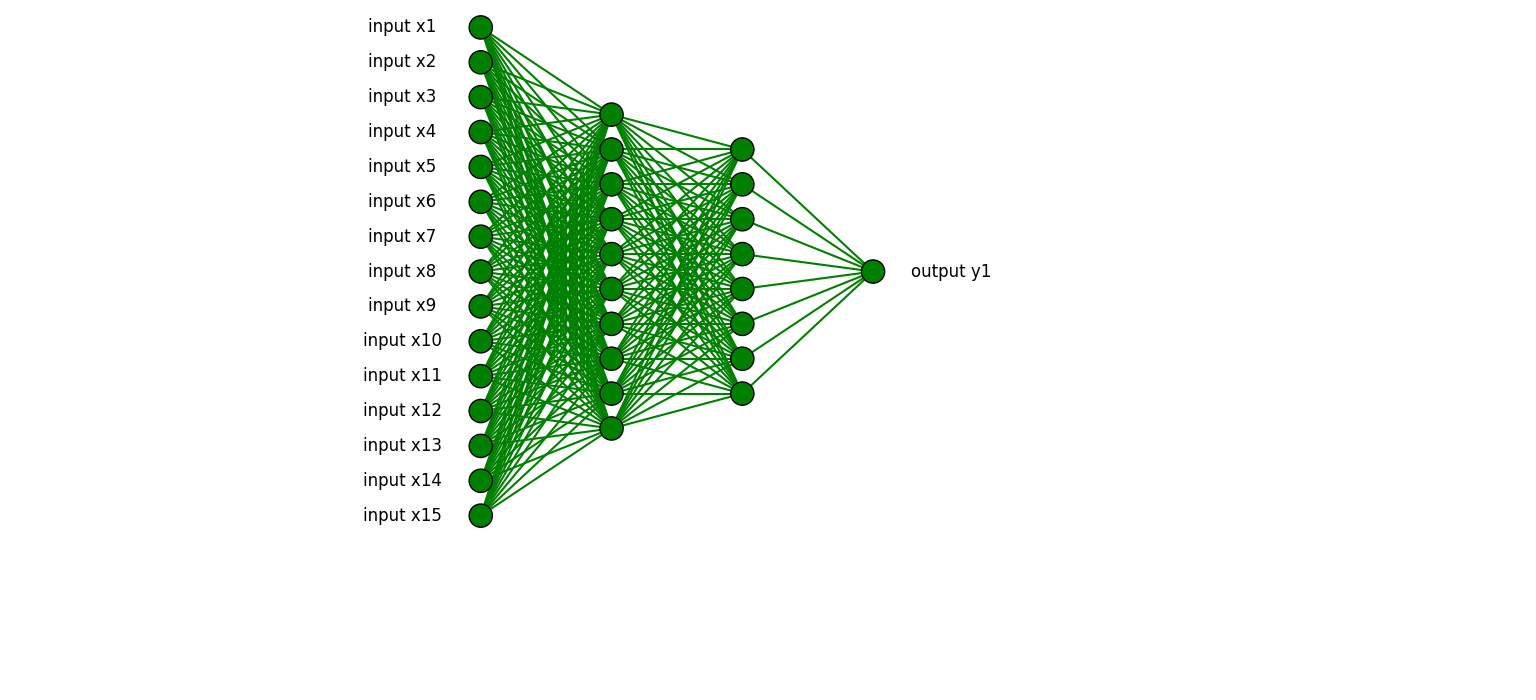

In [3]:
optimizers = [
    RMSProp(learning_rate=0.001),
    RMSProp(learning_rate=0.001),
    RMSProp(learning_rate=0.001)
]

activations = [Sigmoid(), Sigmoid()]

loss = MSELoss()

nn = create_nn([15, 10, 8, 1], activation_function=activations, optimizers=optimizers)
draw_nn(nn)

In [4]:
train_loss = train(nn, loss, X_train, Y_train, epochs=300)

Final Loss = 1.2765322021114456


In [5]:
_ = test_loss(nn, loss, X_test, Y_test)

Loss in test = 1.2830181364149316


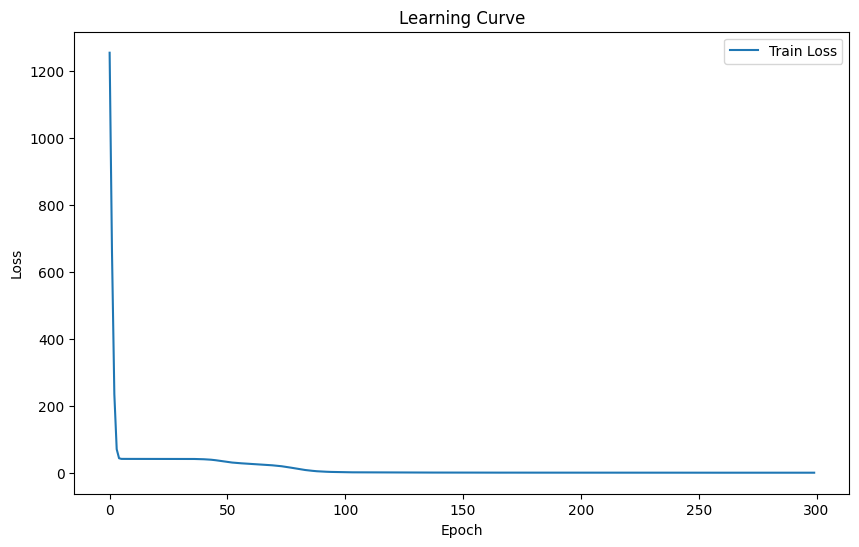

In [6]:
learning_curve(train_loss)

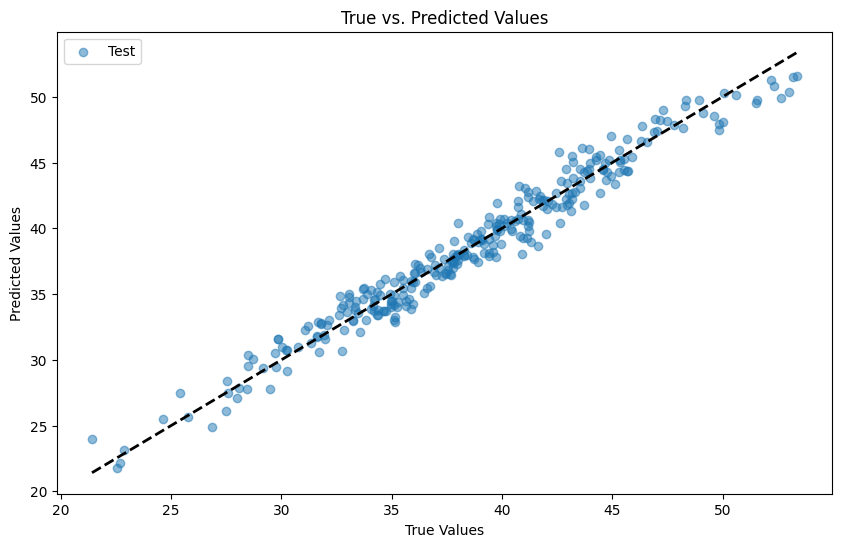

In [7]:
y_pred = []
for X, y in zip(X_test, Y_test):
    output = predict(nn, X)
    y_pred.append(output[0][0])

dispersion_graph(Y_test, y_pred)

# Experimentos Previos

### Test1

In [20]:
optimizers = [
    Adam(learning_rate=0.001),
    Adam(learning_rate=0.001),
    Adam(learning_rate=0.001)
]

activations = [Sigmoid(), Sigmoid()]

loss = MSELoss()

nn = create_nn([15, 15, 16, 1], activation_function=activations, optimizers=optimizers)

train_loss = train(nn, loss, X_train, Y_train, epochs=300)

Final Loss = 1.0059283553264342


In [21]:
_ = test_loss(nn, loss, X_test, Y_test)

Loss in test = 1.5472176697885496


### Test2

In [22]:
optimizers = [
    RMSProp(learning_rate=0.005),
    RMSProp(learning_rate=0.005)
]

activations = [Tanh()]

loss = MSELoss()

nn = create_nn([15, 6, 1], activation_function=activations, optimizers=optimizers)


_ = train(nn, loss, X_train, Y_train, epochs=300)

Final Loss = 4.707776518025114


In [23]:
_ = test_loss(nn, loss, X_test, Y_test)

Loss in test = 5.024808386539721


### Test3

In [24]:
optimizers = [
    SGD(learning_rate=0.01),
    SGD(learning_rate=0.01),
    SGD(learning_rate=0.01)
]

activations = [LeakyRelu(), LeakyRelu()]

loss = MSELoss()

nn = create_nn([15, 20, 2, 1], activation_function=activations, optimizers=optimizers)


_ = train(nn, loss, X_train, Y_train, epochs=300)

Final Loss = 2.5665409963161264e+63


In [25]:
_ = test_loss(nn, loss, X_test, Y_test)

Loss in test = 5.159333447241714e+63


### Test4

In [26]:
optimizers = [
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002)
]

activations = [LeakyRelu(), LeakyRelu()]

loss = MSELoss()

nn = create_nn([15, 5, 3, 1], activation_function=activations, optimizers=optimizers)


_ = train(nn, loss, X_train, Y_train, epochs=300)

Final Loss = 6.092134528101016


In [27]:
_ = test_loss(nn, loss, X_test, Y_test)

Loss in test = 11.819052122616426
